In [1]:
import os, sys, subprocess
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
n_points = 100000
num_runs = 1000

table = defaultdict(list)
for run_no in range(num_runs) :
    print(f"Run #{run_no:6}/{num_runs:6}\r", end='')
    output = subprocess.run(["../bin/test_perf", f"{n_points}"], capture_output=True, encoding='utf-8')
    ignore = list(map(lambda pair: table[pair[0]].append(pair[1]),
                      map(lambda entry: tuple(map(int, entry.split(':'))),
                          output.stdout.split())))

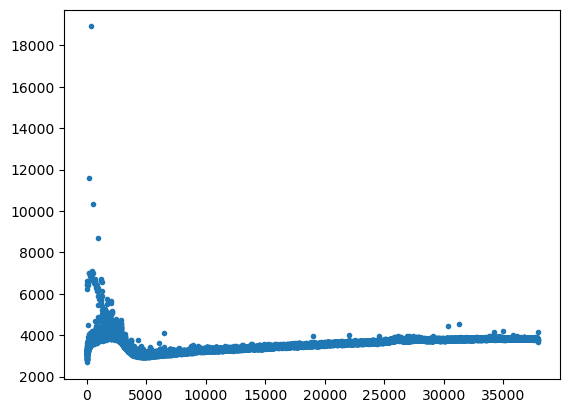

In [3]:
# Generate time plots
avg_times = np.array([[size, np.mean(times)] for size, times in table.items()])
plt.scatter( avg_times[:,0], avg_times[:,1], marker='.' )

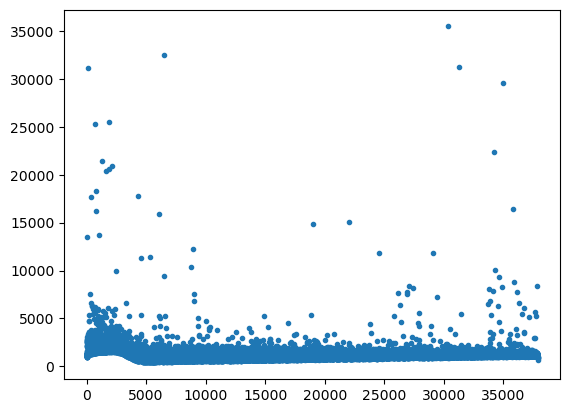

In [4]:
# Estimate deviations from mean.
deviations = np.array([[size, np.std(times)] for size, times in table.items()])
plt.scatter( deviations[:,0], deviations[:,1], marker='.' )

In [5]:
# Club readings into blocks to improve estimators for average operation time and deviation from average.

block_size = 20
avg_sizes = []
avg_times = []
avg_deviations = []
for hull_sizes in range(1, n_points, block_size) :
    # avg_times = np.array([[size, np.mean(times)] for size, times in table.items()])
    mean_hull_size = (hull_sizes + block_size - 1) // 2
    runtimes = []
    deviations = []
    for hull_size in range(hull_sizes, hull_sizes + block_size) :
        if hull_size in table :
            runtimes.extend( table[hull_size] )
            deviations.append( np.mean(table[hull_size]) )
    if len(runtimes) == 0 :
        continue
    avg_sizes.append(mean_hull_size)
    avg_times.append(np.mean(runtimes))
    avg_deviations.append(np.std(deviations))

avg_sizes = np.array(avg_sizes)
avg_times = np.array(avg_times)
avg_deviations = np.array(avg_deviations)


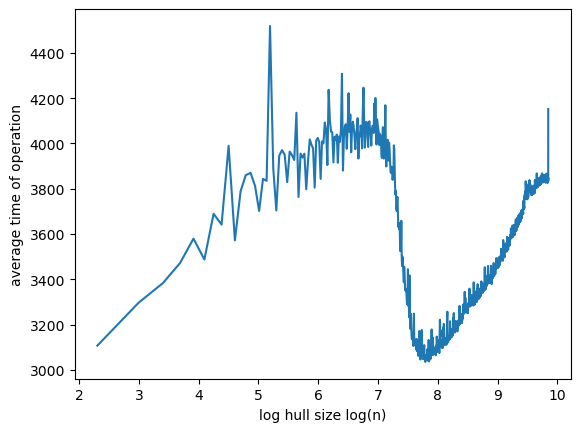

In [6]:
# Generate average running time plot.
plt.xlabel('log hull size log(n)')
plt.ylabel('average time of operation')

plt.plot(np.log(avg_sizes), avg_times, label='average operation times')


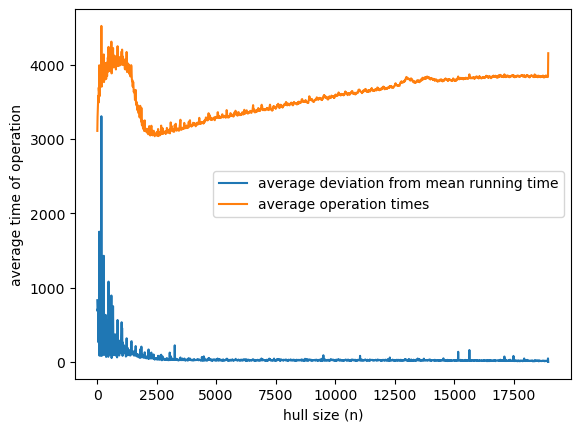

In [7]:
# Generate deviation plot.
plt.xlabel('hull size (n)')
plt.ylabel('average time of operation')

plt.plot(avg_sizes, avg_deviations, label='average deviation from mean running time')
plt.plot(avg_sizes, avg_times, label='average operation times')

plt.legend()